In [118]:
import pandas as pd
from sklearn.ensemble import IsolationForest
df = pd.read_csv("states.csv")
import matplotlib.pyplot as plt

In [119]:
!python -V

Python 3.9.6


In [120]:
iforest = IsolationForest(n_estimators=100).fit(df.iloc[:,1:])

In [121]:
iforestScores = iforest.score_samples(df.iloc[:,1:])

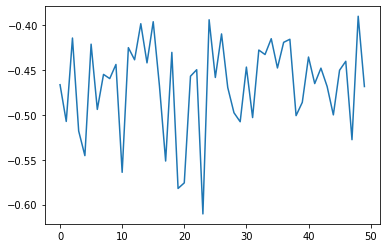

In [122]:
plt.plot(iforestScores)

In [123]:
a = df.columns


In [124]:
import statsmodels.api as sm


In [125]:
df2 = pd.concat([pd.DataFrame(iforestScores),df],axis=1)

df2.columns = a.insert(0,"Anomaly")

In [216]:
import imgkit

def highlight_greaterthan(x):
    if abs(x['Anomaly']) >= .6:
        return ['background-color: purple']*12
    elif abs(x['Anomaly']) >= .55:
        return ['background-color: red']*12
    elif abs(x['Anomaly']) >= .5:
        return ['background-color: yellow']*12
    else:
        return ['background-color: white']*12

html = df2.style.apply(highlight_greaterthan, axis=1).set_precision(2).render()

imgkit.from_string(html, 'state_anomalies.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

<AxesSubplot:>

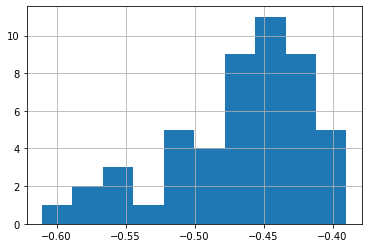

In [132]:
df2["Anomaly"].hist()